In [1]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take some time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-10-27 14:34:25--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.117.234.10, 2600:1409:12:299::317f, 2600:1409:12:2b7::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.117.234.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  89.8MB/s    in 7.9s    

2023-10-27 14:34:33 (99.2 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
# grader-required-cell

source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [4]:
# grader-required-cell

# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')
  train_cats_dir = os.path.join(train_dir, 'cats')
  train_dogs_dir = os.path.join(train_dir, 'dogs')

  validation_cats_dir = os.path.join(validation_dir,'cats')
  validation_dogs_dir = os.path.join(validation_dir,'dogs')
  pass
  os.makedirs(train_dir)
  os.makedirs(validation_dir)
  os.makedirs(train_cats_dir)
  os.makedirs(train_dogs_dir)
  os.makedirs(validation_cats_dir)
  os.makedirs(validation_dogs_dir)


  ### END CODE HERE


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# grader-required-cell

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats


In [6]:
import os
import random
from shutil import copyfile

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  non_empty_files = []
  files = os.listdir(SOURCE_DIR)
  for file in files:
    file_path = os.path.join(SOURCE_DIR, file)
    if os.path.getsize(file_path) > 0:
      non_empty_files.append(file)
    else:
      print(f"{file} is zero length, so ignoring.")

  # Shuffle the list of non-empty files to randomize them.
  random.sample(non_empty_files, len(non_empty_files))

  # Calculate the split index based on SPLIT_SIZE.
  split_index = int(SPLIT_SIZE * len(non_empty_files))

  # Split the files into training and validation sets.
  training_files = non_empty_files[:split_index]
  validation_files = non_empty_files[split_index:]

  # Copy the files to the respective directories.
  for file in training_files:
    source_path = os.path.join(SOURCE_DIR, file)
    destination_path = os.path.join(TRAINING_DIR, file)
    copyfile(source_path, destination_path)

  for file in validation_files:
    source_path = os.path.join(SOURCE_DIR, file)
    destination_path = os.path.join(VALIDATION_DIR, file)
    copyfile(source_path, destination_path)

# Example usage:
# SOURCE_DIR = "PetImages/Cat"
# TRAINING_DIR = "Training/Cat"
# VALIDATION_DIR = "Validation/Cat"
# SPLIT_SIZE = 0.9
# split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE)

In [7]:
# grader-required-cell

# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [8]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE



# Instantiate the ImageDataGenerator class.
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
  validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method.
  train_generator = train_datagen.flow_from_directory(
      directory=TRAINING_DIR,
      batch_size=32,
      class_mode='categorical',
      target_size=(150, 150))

  validation_generator = validation_datagen.flow_from_directory(
      directory=VALIDATION_DIR,
      batch_size=32,
      class_mode='categorical',
      target_size=(150, 150))

  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [10]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.Sequential([
    # Convolution layer with 32 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolution layer with 64 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolution layer with 128 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the output of the convolution layers.
    tf.keras.layers.Flatten(),

    # Dense layer with 128 units and ReLU activation function.
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 2 units and softmax activation function.
    tf.keras.layers.Dense(2, activation='softmax')
  ])

  # Compile the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric.
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [ ]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.Sequential([
    # Convolution layer with 32 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    # Convolution layer with 64 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    # Convolution layer with 128 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    # Flatten the output of the convolution layers.
    tf.keras.layers.Flatten(),

    # Dense layer with 128 units and ReLU activation function.
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 2 units and softmax activation function.
    tf.keras.layers.Dense(2, activation='softmax')
  ])

  # Compile the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric.
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [17]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.Sequential([
    # Convolution layer with 32 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    # Convolution layer with 64 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    # Convolution layer with 128 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    # Flatten the output of the convolution layers.
    tf.keras.layers.Flatten(),

    # Dense layer with 128 units and ReLU activation function.
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 2 units and softmax activation function.
    tf.keras.layers.Dense(2, activation='softmax')
  ])

  # Compile the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric.
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [19]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.Sequential([
    # Convolution layer with 32 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    # Convolution layer with 64 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    # Convolution layer with 128 filters, 3x3 kernel size, and ReLU activation function.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    # Flatten the output of the convolution layers.
    tf.keras.layers.Flatten(),

    # Dense layer with 128 units and ReLU activation function.
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 2 units and softmax activation function.
    tf.keras.layers.Dense(2, activation='softmax')
  ])

  # Compile the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric.
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [20]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
704/704 [==============================] - 68s 91ms/step - loss: 0.6757 - accuracy: 0.5687 - val_loss: 0.6440 - val_accuracy: 0.6304
Epoch 2/15
704/704 [==============================] - 58s 83ms/step - loss: 0.6173 - accuracy: 0.6465 - val_loss: 0.5512 - val_accuracy: 0.7316
Epoch 3/15
704/704 [==============================] - 58s 82ms/step - loss: 0.5539 - accuracy: 0.7085 - val_loss: 0.5475 - val_accuracy: 0.7148
Epoch 4/15
704/704 [==============================] - 57s 80ms/step - loss: 0.4913 - accuracy: 0.7619 - val_loss: 0.5016 - val_accuracy: 0.7492
Epoch 5/15
704/704 [==============================] - 58s 82ms/step - loss: 0.4519 - accuracy: 0.7850 - val_loss: 0.4143 - val_accuracy: 0.8140
Epoch 6/15
704/704 [==============================] - 57s 81ms/step - loss: 0.4175 - accuracy: 0.8071 - val_loss: 0.4291 - val_accuracy: 0.7988
Epoch 7/15
704/704 [==============================] - 57s 80ms/step - loss: 0.3771 - accuracy: 0.8319 - val_loss: 0.4728 - val_accuracy:

KeyboardInterrupt: ignored

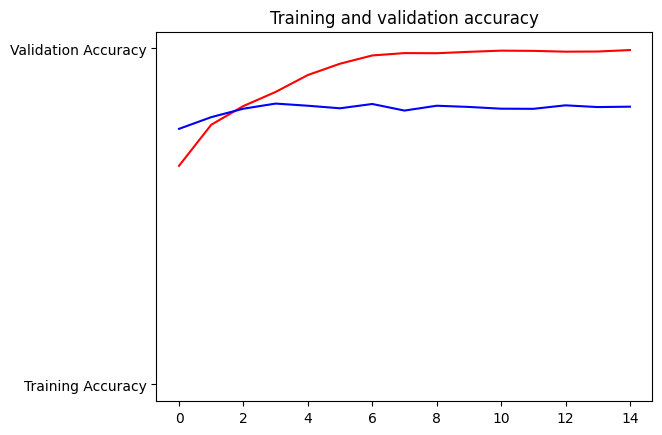

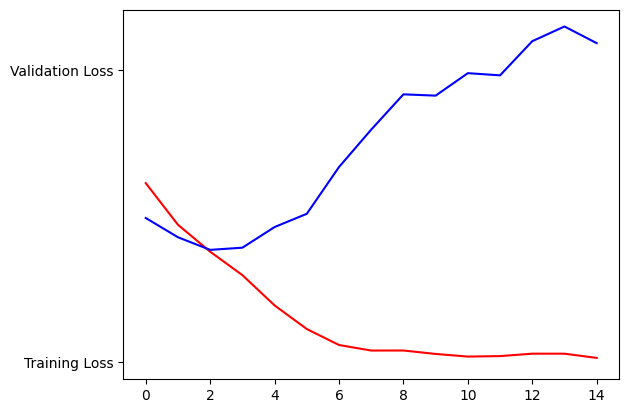

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [13]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Download metadata checker
!wget -nc https://storage.googleapis.com/tensorflow-1-public/colab_metadata_checker.py

--2023-10-27 14:55:20--  https://storage.googleapis.com/tensorflow-1-public/colab_metadata_checker.py
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1997 (2.0K) [text/x-python-script]
Saving to: ‘colab_metadata_checker.py’

colab_metadata_chec 100%[===================>]   1.95K  --.-KB/s    in 0s      

2023-10-27 14:55:20 (47.1 MB/s) - ‘colab_metadata_checker.py’ saved [1997/1997]



In [16]:
import colab_metadata_checker

# Please see the output of this cell to see which file you need to submit to the grader
colab_metadata_checker.run('C2W1_Assignment_fixed.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**IMPORTANT: Missing grader metadata detected! It has now been added and saved to `C2W1_Assignment_fixed.ipynb`. 
The notebook is being downloaded. Please submit C2W1_Assignment_fixed.ipynb to the grader.
